<a href="https://colab.research.google.com/github/OTeeEnabor/ExchangeRateForecast/blob/main/Arima_Exchange_Rate_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

In [3]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Connect Google Sheets 

In [4]:
# authenticating to Google
auth.authenticate_user()
creds,_ = default()
gc =  gspread.authorize(creds)

In [5]:
exchange_sheet = gc.open('Exchange Rate').sheet1
# get all values 
rows = exchange_sheet.get_all_values()
# convert to df
exchange_df = pd.DataFrame(rows)
# show the head of data frame
exchange_df.head()


,0,1,2,3,4,5,6
0,Date/USD,WVT,ITL,ITK,ITN,ITM,ITB
1,Date,South African (Rand),Mauritian Rupee,Kenyan Shilling,Nigerian Naira,Mozambique Metical,Botswana Pula
2,2022-03-12,15.03,44.48,114.16,415.69,63.83,11.56
3,2022-03-13,15.03,44.50,114.19,415.80,63.84,11.56
4,2022-03-14,15.02,44.46,114.01,415.22,63.80,11.55


In [6]:
exchange_df = exchange_df.iloc[1:]
exchange_df.head()

,0,1,2,3,4,5,6
1,Date,South African (Rand),Mauritian Rupee,Kenyan Shilling,Nigerian Naira,Mozambique Metical,Botswana Pula
2,2022-03-12,15.03,44.48,114.16,415.69,63.83,11.56
3,2022-03-13,15.03,44.50,114.19,415.80,63.84,11.56
4,2022-03-14,15.02,44.46,114.01,415.22,63.80,11.55
5,2022-03-15,15.12,44.40,114.25,415.79,63.84,11.62


In [7]:
exchange_df.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object

In [8]:
exchange_df.columns= exchange_df.iloc[0]

In [9]:
exchange_df.columns

Index(['Date', 'South African (Rand)', 'Mauritian Rupee', 'Kenyan Shilling',
       'Nigerian Naira', 'Mozambique Metical', 'Botswana Pula'],
      dtype='object', name=1)

In [10]:
exchange_df = exchange_df.iloc[1:]
exchange_df.head()

1,Date,South African (Rand),Mauritian Rupee,Kenyan Shilling,Nigerian Naira,Mozambique Metical,Botswana Pula
2,2022-03-12,15.03,44.48,114.16,415.69,63.83,11.56
3,2022-03-13,15.03,44.50,114.19,415.80,63.84,11.56
4,2022-03-14,15.02,44.46,114.01,415.22,63.80,11.55
5,2022-03-15,15.12,44.40,114.25,415.79,63.84,11.62
6,2022-03-16,15.08,44.33,114.24,415.74,63.81,11.63


In [11]:
exchange_df[['South African (Rand)', 'Mauritian Rupee', 'Kenyan Shilling','Nigerian Naira', 'Mozambique Metical', 'Botswana Pula']] = exchange_df[['South African (Rand)', 'Mauritian Rupee', 'Kenyan Shilling','Nigerian Naira', 'Mozambique Metical', 'Botswana Pula']].apply(pd.to_numeric)


In [12]:
exchange_df.dtypes

1
Date                     object
South African (Rand)    float64
Mauritian Rupee         float64
Kenyan Shilling         float64
Nigerian Naira          float64
Mozambique Metical      float64
Botswana Pula           float64
dtype: object

In [13]:
exchange_df = exchange_df.reset_index(drop=True)

In [14]:
exchange_df.head()

1,Date,South African (Rand),Mauritian Rupee,Kenyan Shilling,Nigerian Naira,Mozambique Metical,Botswana Pula
0,2022-03-12,15.03,44.48,114.16,415.69,63.83,11.56
1,2022-03-13,15.03,44.50,114.19,415.80,63.84,11.56
2,2022-03-14,15.02,44.46,114.01,415.22,63.80,11.55
3,2022-03-15,15.12,44.40,114.25,415.79,63.84,11.62
4,2022-03-16,15.08,44.33,114.24,415.74,63.81,11.63


In [15]:
exchange_df['Date'] = pd.to_datetime(exchange_df['Date'])

In [16]:
exchange_df.rename(columns = 
                   {"South African (Rand)": "ZAR",
                    "Mauritian Rupee": "MUR",
                    "Kenyan Shilling": "KSH",
                    "Nigerian Naira": "NRA",
                    "Mozambique Metical":"MZM",
                    "Botswana Pula": "BPU"}, inplace=True)

In [17]:
exchange_df.head()

1,Date,ZAR,MUR,KSH,NRA,MZM,BPU
0,2022-03-12,15.03,44.48,114.16,415.69,63.83,11.56
1,2022-03-13,15.03,44.50,114.19,415.80,63.84,11.56
2,2022-03-14,15.02,44.46,114.01,415.22,63.80,11.55
3,2022-03-15,15.12,44.40,114.25,415.79,63.84,11.62
4,2022-03-16,15.08,44.33,114.24,415.74,63.81,11.63


# Distribution Plots

In [18]:
currency_list = ['ZAR', 'MUR', 'KSH', 'NRA','MZM','BPU']

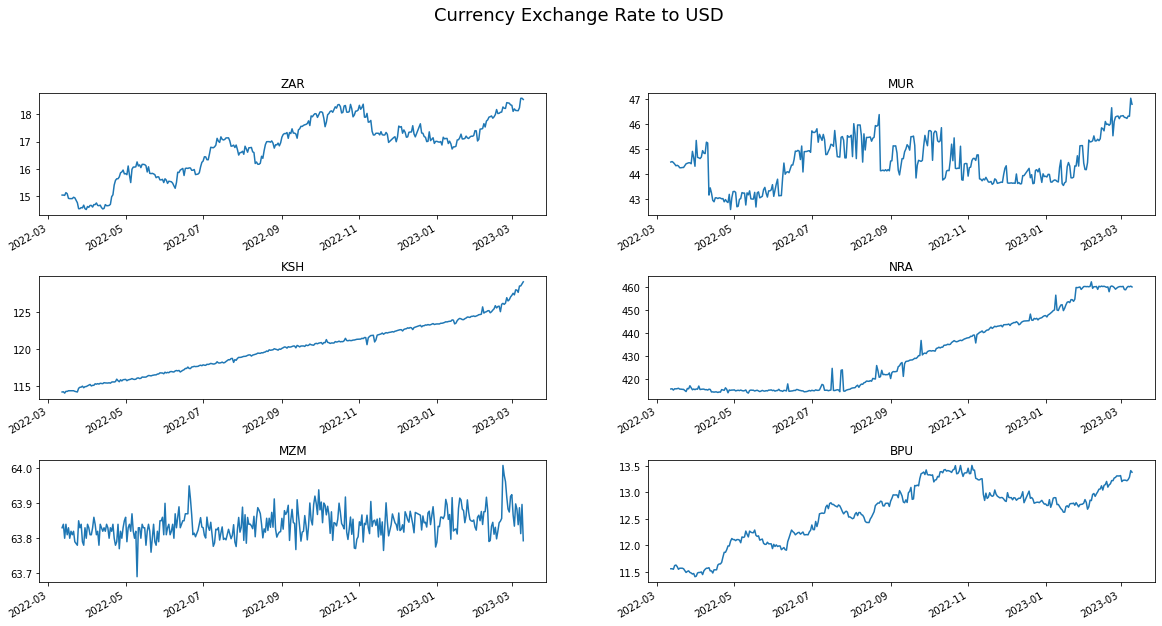

In [19]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Currency Exchange Rate to USD', fontsize=18,y=1)

# loop through the length of currencies and keep track of index
for n, currency in enumerate(currency_list):
  # add new subplot iteratively
  ax = plt.subplot(3,2,n+1)
  exchange_df.plot(x='Date',y=currency,ax=ax, legend=None)
  # chart formating
  ax.set_title(currency.upper())
  # ax.get_legend().remove()
  ax.set_xlabel("")

## Determine Stationarity
Is it a stationary series?
1. The mean of the time series should not be a finction of time. It should be constant.
2. The variance of the time series should not be a function of time.
3. The covariance of the ith term and the (i+m)th term should not be a function of time.

 

From a visual inspection, AR, MUR, KSH, NRA, and BPU time series are not stationary due to the upward trend in the exchange rate of these currencies. 

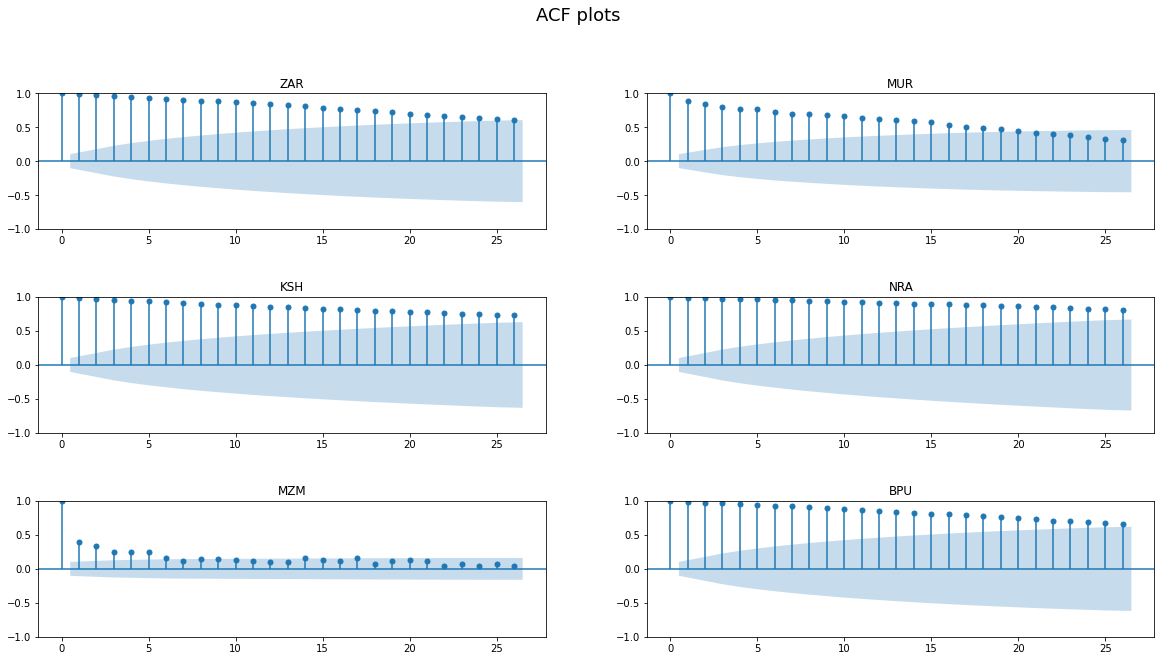

In [20]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('ACF plots', fontsize=18,y=1)

# loop through the length of currencies and keep track of index
for n, currency in enumerate(currency_list):
  # add new subplot iteratively
  ax = plt.subplot(3,2,n+1)
  plot_acf(x=exchange_df[currency],ax=ax)
  # chart formating
  ax.set_title(currency.upper())
  # ax.get_legend().remove()
  ax.set_xlabel("")

As expected, the ACF plots show us that the majority of these time series data is not stationary. For a stationary time series, the ACF plot will drop to zero relatively quickly, while ACF for non-stationary series descreases slowly.

In [21]:
non_stationary_currency_list = ['ZAR', 'MUR', 'KSH','NRA', 'BPU']


In [22]:
exchange_df['ZAR'].diff()

0           NaN
1      0.000000
2     -0.010000
3      0.100000
4     -0.040000
         ...   
359   -0.005456
360    0.108944
361    0.346145
362    0.003556
363   -0.046543
Name: ZAR, Length: 364, dtype: float64

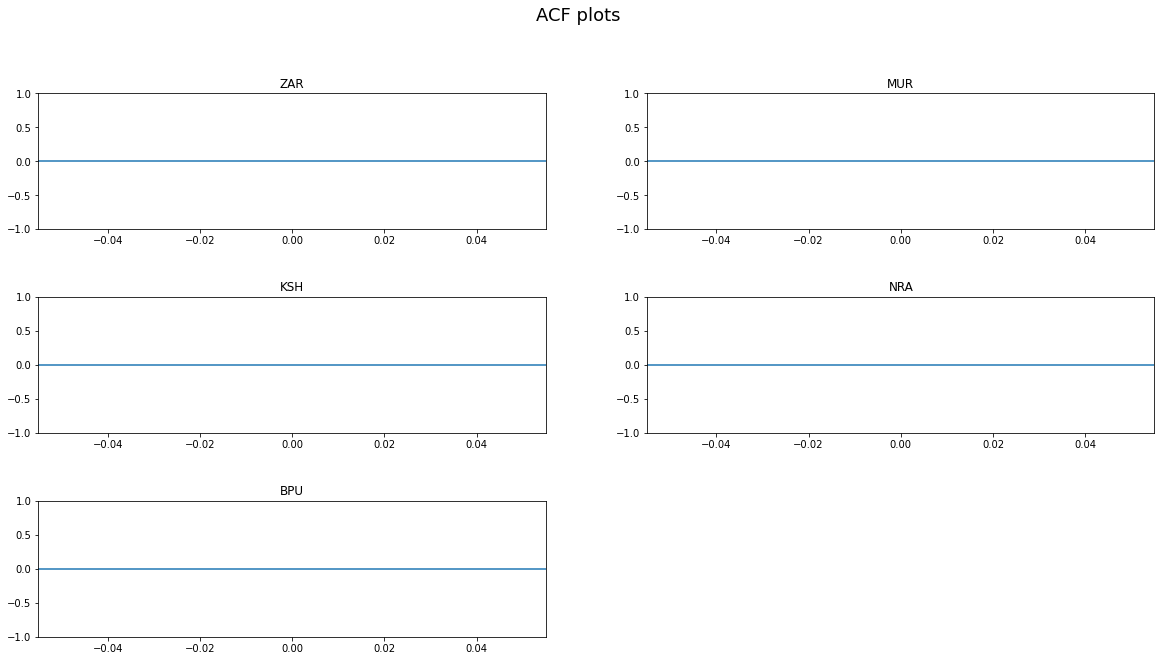

In [23]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('ACF plots', fontsize=18,y=1)

# loop through the length of currencies and keep track of index
for n, currency in enumerate(non_stationary_currency_list):
  # add new subplot iteratively
  ax = plt.subplot(3,2,n+1)
  plot_acf(x=exchange_df[currency].diff(),ax=ax)
  # chart formating
  ax.set_title(currency.upper())
  # ax.get_legend().remove()
  ax.set_xlabel("")

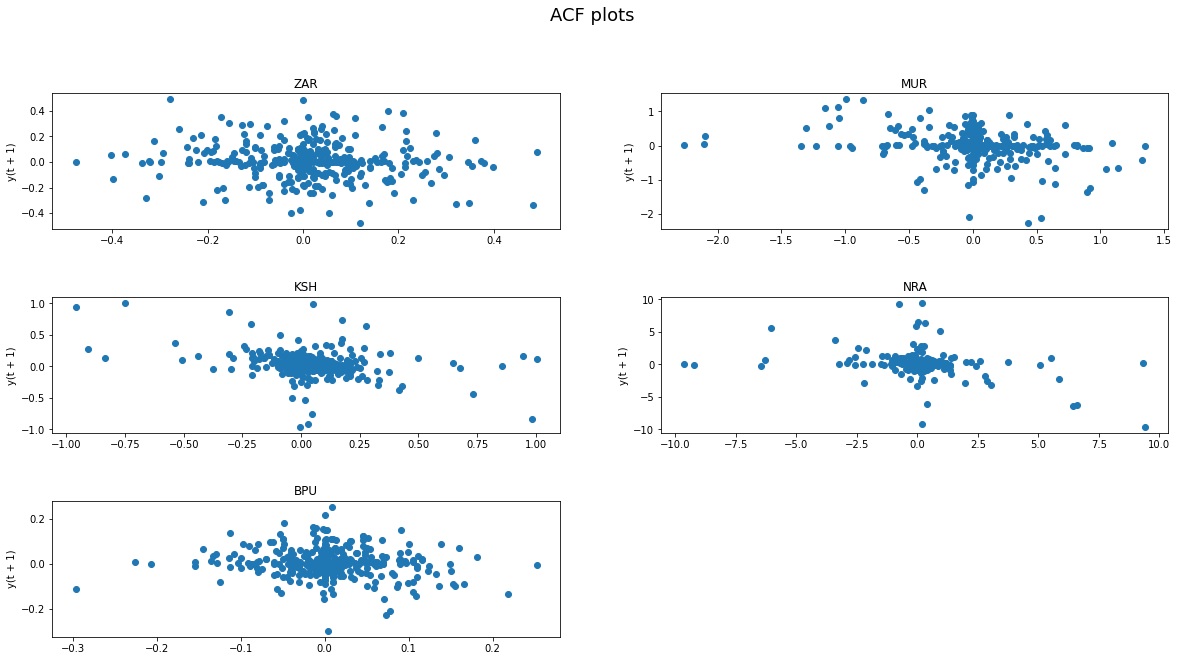

In [26]:
from pandas.plotting import lag_plot
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('ACF plots', fontsize=18,y=1)
# loop through the length of currencies and keep track of index
for n, currency in enumerate(non_stationary_currency_list):
  # add new subplot iteratively
  ax = plt.subplot(3,2,n+1)
  lag_plot(exchange_df[currency].diff(),ax=ax)
  # chart formating
  ax.set_title(currency.upper())
  # ax.get_legend().remove()
  ax.set_xlabel("")

In [28]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.5 MB/s eta 0:00:00


In [30]:
from pmdarima.arima import auto_arima, ADFTest


In [ ]:
# adf_test = ADFTest(alpha=0.05)
# adf_test.should_diff(df_forecast['Transaction amount'])

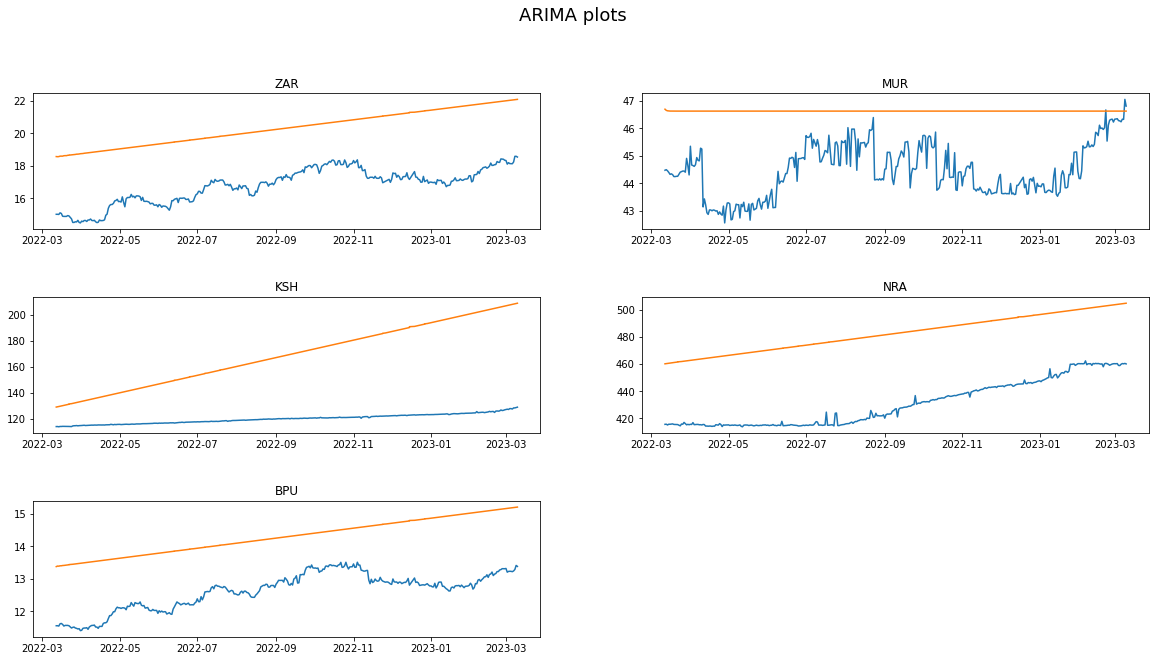

In [37]:
from pandas.plotting import lag_plot
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('ARIMA plots', fontsize=18,y=1)
# loop through the length of currencies and keep track of index
for n, currency in enumerate(non_stationary_currency_list):
  # add new subplot iteratively
  ax = plt.subplot(3,2,n+1)
  arima_model = auto_arima(exchange_df[currency])
  pred = arima_model.predict(n_periods = len(exchange_df['Date']))
  ax.plot(exchange_df['Date'], exchange_df[currency])
  ax.plot(exchange_df['Date'], pred)
  # plt.plot(x=exchange_df['Date'], y = [exchange_df[currency],pred],ax=ax)
  # chart formating
  ax.set_title(currency.upper())
  # ax.get_legend().remove()
  ax.set_xlabel("")